# Pre-Trained Model(미리 학습된 모델)을 이용한 전이학습

### Keras에서 제공하는 Pre-Trained Model 
- tensorflow.keras.applications 패키지를 통해 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko
    - Modules
        - 각 모델 생성 함수와 전처리 함수제공
    - Functions
        - 모델 생성함수 제공
- 모델 생성함수의 주요 매개변수
    - `weights`: 모형의 학습된 weight. 기본값- 'imagenet'
    - `include_top`: fully connected layer를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
    - `input_shape`: 사용자가 입력할 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224, 3)

## Keras Pretrained 모델을 조회

In [1]:
# 이미지 다운로드
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

# 디렉토리 만들기
!mkdir data

# 압축풀기
!unzip -q ./cats_and_dogs_small.zip -d data/cats_and_dogs_small

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: /content/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:01<00:00, 59.7MB/s]


In [12]:
from tensorflow import keras

# Keras Pretrained 모델 조회
vgg16 = keras.applications.VGG16(weights = "imagenet",
                                include_top = False, # classification layer 가져올지 여부
                                input_shape = (224, 224, 3) # 사용자가 입력할 input의 size
                                )
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# Keras Pretrained 모델을 조회

vgg16_2 = keras.applications.VGG16(weights = "imagenet",
                                   include_top = True,
                                   input_shape = (224, 224, 3)
                                   )
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

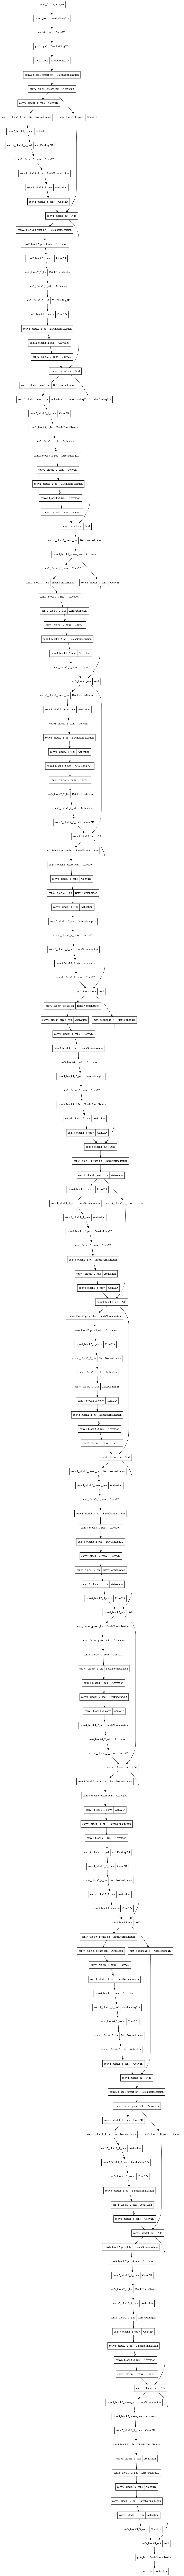

In [10]:
# Keras Pretrained 모델을 조회
resnet50 = keras.applications.ResNet50V2(include_top=False)
keras.utils.plot_model(resnet50)

17235968/17225924 [==============================] - 0s 0us/step


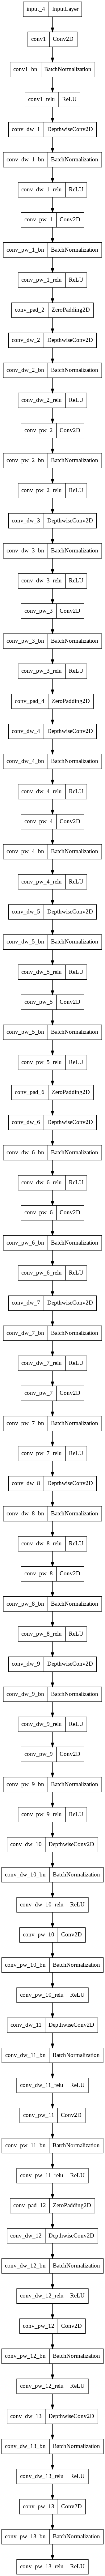

In [9]:
# Keras Pretrained 모델 조회
mobilenet = keras.applications.MobileNet(include_top=False)
keras.utils.plot_model(mobilenet)

<hr>

##  pretrained 모델을 이용한 추론
- 전이학습(재학습) 없이 추론

#### VGG16 - dog

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [20]:
# 추론할 사진 load
img = load_img('data/dog2.jpeg', target_size=(224, 224)) # pillow image 타입
img_np = img_to_array(img) # ndarray 변환
img_np = img_np[np.newaxis, ...] # batch 축 추가

# img 전처리
img_tensor = keras.applications.vgg16.preprocess_input(img_np)
# keras vgg16 모델에서 했던 전처리 방식을 사용

# 모델 생성 및 추론
vgg16 = keras.applications.VGG16() # include_top = True(default)
pred = vgg16.predict(img_tensor)
pred_label = np.argmax(pred, axis=1)
print(np.max(pred, axis=1), pred_label)
pred_cls = keras.applications.vgg16.decode_predictions(pred, top=10) # 예측 확률 이 높은 확률 10개 뽑아줌
print(pred_cls)

[0.77819943] [267]
49152/35363 [=========================================] - 0s 0us/step
[[('n02113799', 'standard_poodle', 0.77819943), ('n02088094', 'Afghan_hound', 0.07052341), ('n02091831', 'Saluki', 0.04592728), ('n02093647', 'Bedlington_terrier', 0.019006025), ('n02483362', 'gibbon', 0.017663637), ('n02113712', 'miniature_poodle', 0.006132953), ('n02091134', 'whippet', 0.005521408), ('n02099601', 'golden_retriever', 0.0044855177), ('n02102318', 'cocker_spaniel', 0.0030711985), ('n02104029', 'kuvasz', 0.0023593327)]]


## Feature extraction의 두 가지 방법
1. **빠른 추출방식**
    - 예측하려는 새로운 데이터를 위의 `conv_base`에 입력하여 나온 출력값을 numpy 배열로 저장하고 이를 분류 모델의 입력값으로 사용. Convolution operation을 하지 않아도 되기 때문에 빠르게 학습. 하지만 data augmentation 방법을 사용할 수 없음.

2. **받아온 특성 Layer를 이용해 새로운 모델 구현하는 방식**
    - 위의 `conv_base` 이후에 새로운 layer를 쌓아 확장한 뒤 전체 모델을 다시 학습. 모든 데이터가 convolution layer들을 통과해야 하기 때문에 학습이 느림. 단 conv_base의 가중치는 업데이트 되지 않도록 한다. data augmentation 방법을 사용할 수 있음.


## 빠른 특성 추출 방식
- Pretrained 된 `conv_base`의 predict 메소드로 입력 이미지의 feature를 추출 
- 그것을 dense layer에 넣어 학습

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)


In [22]:
# 이미지 다운로드
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: /content/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:00<00:00, 335MB/s]


'cats_and_dogs_small.zip'

In [23]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 30
N_BATCHS = 100

IMAGE_SIZE = (224, 224)

In [24]:
# Keras Pretrained 모델 출력 확인 
conv_base = applications.VGG16(include_top=False, input_shape=(224, 224, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
def extract_featuremap(img_path, sample_counts):
  '''
  매개변수로 받은 경로의 이미지들을 Feature Extractor 모델(Conv base)을 통과시켜 Feature Madp들을 추출해 반환하는 함수
  [매개변수]
    img_path  : str - 이미지 데이터셋이 있는 root 경로
    sample_count : int - 특성을 추출한 이미지 개수
  [반환값]
    tuple - (feature maps들 : ndarray, label : ndarray)
  '''

  conv_base = applications.VGG16(include_top=False, input_shape=IMAGE_SIZE+(3,))
  
  # 결과를 답을 ndarray 생성
  ## feature map을 담을 ndarray
  result_featuremaps = np.zeros(shape=(sample_counts, 7, 7, 512)) # conv_base의 출력 shape와 맞춤
  ## label을 답을 ndarray 생성
  result_labels = np.zeros(shape=(sample_counts, ))

  # ImageDataGenerator 생성
  img_gen = ImageDataGenerator(preprocessing_function=applications.vgg16.preprocess_input) # 전처리 함수를 설정
  img_iter = img_gen.flow_from_directory(img_path, target_size = IMAGE_SIZE, batch_size=N_BATCHS, class_mode = "binary")

  cnt = 0 
  for input_batch, label_batch in img_iter:
    feature_map = conv_base.predict(input_batch) #batch단위로 읽어온 이미지를  conv_base를 이용해 predict => output feature map이 반환
    
    # 결과를 담을 ndarray에 추가
    result_featuremaps[cnt*N_BATCHS: (cnt+1)*N_BATCHS] = feature_map
    result_labels[cnt*N_BATCHS : (cnt+1)*N_BATCHS] = label_batch

    cnt += 1

    if cnt*N_BATCHS >= sample_counts: # 다음 결과를 저장할 배열의 시작 index가 sample_counts 이상이면 반복문 빠져나옴(원하는 개수의 feature map을 다 저장했으므로)
      break
  
  return result_featuremaps, result_labels

In [27]:
# 데이터 경로
train_dir = "data/cats_and_dogs_small/train"
validation_dir = "data/cats_and_dogs_small/validation"
test_dir = "data/cats_and_dogs_small/test"

train_features, train_labels = extract_featuremap(train_dir, 2000)
validation_features, validation_labels = extract_featuremap(validation_dir, 1000)
test_features, test_labels = extract_featuremap(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
# 확인
print(train_features.shape, train_labels.shape)
print(validation_features.shape, validation_labels.shape)
print(test_features.shape, test_labels.shape)

(2000, 7, 7, 512) (2000,)
(1000, 7, 7, 512) (1000,)
(1000, 7, 7, 512) (1000,)


### classification 모델 네트워크 정의 학습

In [32]:
def create_model_1():
  model = keras.Sequential()
  # GAP 적용
  model.add(layers.GlobalAveragePooling2D(input_shape=(7, 7, 512))) #Input=>VGG16을 통과한 Feature map => GAP이용해서 flatten
  # outputlayer
  model.add(layers.Dense(units=1, activation="sigmoid")) # sigmoid를 이용한 이진분류

  return model

In [34]:
# 모델 생성
model_1 = create_model_1()
model_1.compile(optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [35]:
hist = model_1.fit(train_features, train_labels,
                   epochs=N_EPOCHS, batch_size = N_BATCHS,
                   validation_data = (validation_features, validation_labels)
                   )

Epoch 1/30
20/20 [==============================] - 1s 29ms/step - loss: 1.2363 - accuracy: 0.7165 - val_loss: 0.6708 - val_accuracy: 0.8280
Epoch 2/30
20/20 [==============================] - 0s 16ms/step - loss: 0.3909 - accuracy: 0.8785 - val_loss: 0.3045 - val_accuracy: 0.9030
Epoch 3/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2237 - accuracy: 0.9300 - val_loss: 0.2266 - val_accuracy: 0.9280
Epoch 4/30
20/20 [==============================] - 0s 9ms/step - loss: 0.1646 - accuracy: 0.9425 - val_loss: 0.1912 - val_accuracy: 0.9380
Epoch 5/30
20/20 [==============================] - 0s 9ms/step - loss: 0.1323 - accuracy: 0.9515 - val_loss: 0.1687 - val_accuracy: 0.9500
Epoch 6/30
20/20 [==============================] - 0s 10ms/step - loss: 0.1086 - accuracy: 0.9585 - val_loss: 0.1537 - val_accuracy: 0.9560
Epoch 7/30
20/20 [==============================] - 0s 10ms/step - loss: 0.0935 - accuracy: 0.9645 - val_loss: 0.1466 - val_accuracy: 0.9560
Epoch 8/30
20/2

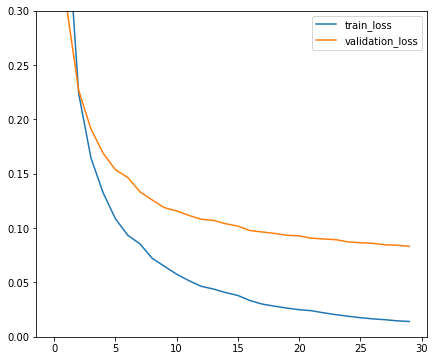

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.plot(range(N_EPOCHS), hist.history['loss'], label = "train_loss")
plt.plot(range(N_EPOCHS), hist.history['val_loss'], label="validation_loss")
plt.ylim(0, 0.3)
plt.legend()
plt.show()

In [38]:
model_1.evaluate(test_features, test_labels)

32/32 [==============================] - 0s 6ms/step - loss: 0.1321 - accuracy: 0.9680


[0.13207365572452545, 0.9679999947547913]

### 추론 

In [2]:
def predict_cat_dog(img_path, model, preprocess_input, mode=False):
  '''
  이미지를 받아서 모델을 이용해 추론 후 결과를 반환하는 함수
  [매개변수]
    img_path : str - 추론(분류)할 이미지 경로
    model : 학습된 모델 객체
    preprocess_input : 이미지 전처리 함수
    mode : conv_base(convolution)을 통해 feature를 추출할지 여부
  [반환값]
    tuple : (예측 확률, 예측 라벨 index, 예측 라벨명)
  '''
  class_names = ['Cat', 'Dog']
  img = load_img(img_path, target_size=(224, 224))
  img_np = img_to_array(img)
  img_np = img_np[np.newaxis, ...]

  input_tensor = preprocess_input(img_np)

  if mode:
    conv_base = applications.VGG16(include_top=False, input_shape=IMAGE_SIZE+(3,))
    input_tensor = conv_base.predict(input_tensor)

  pred = model.predict(input_tensor)
  pred_class = np.where(pred <= 0.5, 0, 1)
  pred_label = class_names[pred_class[0, 0]]

  return pred, pred_class, pred_label


In [43]:
predict_cat_dog('/content/data/dog2.jpeg', model_1, applications.vgg16.preprocess_input, True)

(array([[1.]], dtype=float32), array([[1]]), 'Dog')

In [44]:
predict_cat_dog('/content/data/cat.jpeg', model_1, applications.vgg16.preprocess_input, True)

(array([[3.1489067e-10]], dtype=float32), array([[0]]), 'Cat')

## Pretrained Network를 이용해 새로운 모델 구현하는 방식
- Conv_base의 feature extraction 부분에 fully connected layer를 추가하여 모형 생성 
- Conv_base에서 가져온 부분은 학습을 하지 않고 weight를 고정
    -  **Layer.trainable=False**

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [4]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE= 224

In [5]:
## ImageDataGenerator를 생성하는 함수 
def get_generator(preprocess_input):
  '''
  train/validation/test 용 ImageDataGenerator 생성해서 반환하는 함수
  [파라미터]
    preprocess_input: 전처리 함수
  [반환값]
    tuple : (train_iter, validation_iter, test_iter)
  '''
  # 경로
  train_dir = "data/cats_and_dogs_small/train"
  val_dir = "data/cats_and_dogs_small/validation"
  test_dir = "data/cats_and_dogs_small/test"

  # train generator : image augumentation 적용
  train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                     rotation_range=40,
                                     brightness_range=[0.7, 1.3],
                                     zoom_range=0.2,
                                     horizontal_flip = True,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode = "constant"
                                     )
  val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
  test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

  train_iter = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size = N_BATCHS, class_mode = "binary" )
  val_iter = val_datagen.flow_from_directory(val_dir, target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size = N_BATCHS, class_mode = "binary")
  test_iter= test_datagen.flow_from_directory(test_dir,target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size = N_BATCHS, class_mode = "binary")
    
  return train_iter, val_iter, test_iter

In [6]:
train_iter, val_iter, test_iter = get_generator(applications.vgg16.preprocess_input)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델 정의

In [7]:
def create_model_2():
  model = keras.Sequential()

  # Feature Extractor(Conv_base) - 기존 predtrained 모델 사용
  conv_base = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

  # model에 conv_base 추가
  conv_base.trainable = False # 모델 학습시 weight를 최적화(update)하지 않도록 설정
  ## frozon => 모델 컴파일 전에 설정
  model.add(conv_base)

  # classification 영역 - 새로 정의
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(units=1, activation = "sigmoid"))

  return model

In [8]:
model_2 = create_model_2()
model_2.compile(optimizer = keras.optimizers.Adam(LEARNING_RATE), loss = 'binary_crossentropy', metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
# 모델 학습
hist = model_2.fit(train_iter, epochs = N_EPOCHS,
                   steps_per_epoch = len(train_iter),
                   validation_data = val_iter,
                   validation_steps = len(val_iter))

Epoch 1/20
20/20 [==============================] - 45s 1s/step - loss: 1.2765 - accuracy: 0.6410 - val_loss: 0.9471 - val_accuracy: 0.7330
Epoch 2/20
20/20 [==============================] - 29s 1s/step - loss: 0.5513 - accuracy: 0.8150 - val_loss: 0.4815 - val_accuracy: 0.8610
Epoch 3/20
20/20 [==============================] - 29s 1s/step - loss: 0.3566 - accuracy: 0.8760 - val_loss: 0.2998 - val_accuracy: 0.9090
Epoch 4/20
20/20 [==============================] - 29s 1s/step - loss: 0.2549 - accuracy: 0.9085 - val_loss: 0.2569 - val_accuracy: 0.9210
Epoch 5/20
20/20 [==============================] - 30s 2s/step - loss: 0.2508 - accuracy: 0.9095 - val_loss: 0.2547 - val_accuracy: 0.9230
Epoch 6/20
20/20 [==============================] - 29s 1s/step - loss: 0.1836 - accuracy: 0.9320 - val_loss: 0.2434 - val_accuracy: 0.9220
Epoch 7/20
20/20 [==============================] - 29s 1s/step - loss: 0.1928 - accuracy: 0.9315 - val_loss: 0.2187 - val_accuracy: 0.9340
Epoch 8/20
20/20 [==

In [11]:
# 평가
model_2.evaluate(test_iter)

10/10 [==============================] - 4s 361ms/step - loss: 0.1099 - accuracy: 0.9710


[0.10989269614219666, 0.9710000157356262]

In [16]:
predict_cat_dog('/content/data/cat.jpeg', model_2, applications.vgg16.preprocess_input)

(array([[4.1800403e-11]], dtype=float32), array([[0]]), 'Cat')

In [17]:
predict_cat_dog('/content/data/dog2.jpeg', model_2, applications.vgg16.preprocess_input)

(array([[1.]], dtype=float32), array([[1]]), 'Dog')

## 미세조정(Fine-tuning)

## Model, Layer에서 weight 조회

### Model에서 Layer들 조회
- model객체.layers
    - 모델을 구성하는 layer 객체들을 담은 리스트
- model객체.get_layer(Layer이름:str)
    - argument로 전달한 이름의 Layer객체를 반환
    
### Model과 Layer의 weight들 조회 및 설정
- Layer와 Model은 Weight조회와 관련해 세가지 속성을 제공
    - weights: 레이어의 모든 weight 변수들을 담은 리스트
        - get_weights() : 레이어의 모든 weight 변수 리스트를 카피해서 반환한다.
    - trainable_weights: Train(학습)시 업데이트 되는 weights들 리스트
    - non_trainable_weights: Train(학습)시 업데이트 되지 않는(훈련되지 않는) weights들 리스트
- Layer와 Model은 boolean 값을 가지는 속성 `trainable`을 제공
    - trainable을 False로 설정하면 Layer의 weights들이 훈련가능에서 **훈련 불가능** 상태로 변경된다. 이런 상태를 **Frozen-동결** 이라고 하며 학습시 weight들이 업데이트 되지 않는다.

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 

test_model = keras.Sequential()
test_model.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28, 1)))
test_model.add(layers.MaxPooling2D(padding="same"))

test_model.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation = "relu"))
test_model.add(layers.MaxPooling2D(padding="same"))

test_model.add(layers.Flatten())
test_model.add(layers.Dense(units=128, activation="relu"))
test_model.add(layers.Dense(units=1, activation="sigmoid", name="output"))

test_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [31]:
# 모델을 구성하는 레이어들을 조회
test_layers = test_model.layers
print(type(test_layers), len(test_layers))
print(test_layers)

# 레이어의 이름 조회 - layers 객체.name
print(test_layers[0].name, test_layers[6].name)

# 모델에서 레이어의 이름으로 특정 레이어만 조회
output_layer = test_model.get_layer("output")
print(output_layer)
conv_layer_1 = test_model.get_layer("conv2d_1")
print(conv_layer_1)

# layer로부터 parameter(weight, bias) 조회
params = conv_layer_1.weights #[weights들, bias들]
print(type(params), len(params))
print(params[0].shape) # (height, width, channel, filter수)
print(params[1].shape) # bias

<class 'list'> 7
[<keras.layers.convolutional.Conv2D object at 0x7f0f401c0750>, <keras.layers.pooling.MaxPooling2D object at 0x7f0f511eacd0>, <keras.layers.convolutional.Conv2D object at 0x7f0f511fbb10>, <keras.layers.pooling.MaxPooling2D object at 0x7f0f4017bf50>, <keras.layers.core.flatten.Flatten object at 0x7f0f4018aa50>, <keras.layers.core.dense.Dense object at 0x7f0f511e7b90>, <keras.layers.core.dense.Dense object at 0x7f0f401dcfd0>]
conv2d output
<class 'list'> 2
(3, 3, 32, 32)
(32,)


## Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [55]:
# 하이퍼파라미터 생성
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

In [56]:
conv_base = applications.VGG16(include_top = False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [57]:
# 모델 생성
def create_model_3():
  model = keras.Sequential()

  conv_base = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

  # conv_base에서 block5_conv2 이하 레이어들(top layer 2개)은 trainable 나머지는 non trainable로 구성
  is_trainable = False
  for layer in conv_base.layers:
    if layer.name == "block5_conv2":
      is_trainable = True
    layer.trainable = is_trainable

  model.add(conv_base)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(units=1, activation="sigmoid"))

  return model

In [58]:
model_3 = create_model_3()
model_3.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

In [59]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 4,720,129
Non-trainable params: 9,995,072
_________________________________________________________________


In [60]:
# 모델 저장 설정
## 경로설정

save_path = "/content/drive/MyDrive/ColabNotebooks/cat_dog_model/transfer_learning"
if not os.path.isdir(save_path):
  os.mkdir(save_path)
# 
mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_path, save_best_only=True, monitor="val_loss", verbose=2)


In [ ]:
train_iter, val_iter, test_iter = get_generator(applications.vgg16.preprocess_input)

In [61]:

hist = model_3.fit(train_iter, epochs=N_EPOCHS,
                   steps_per_epoch = len(train_iter),
                   validation_data= val_iter,
                   validation_steps = len(val_iter),
                   callbacks=[mc_callback])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 5.7760 - accuracy: 0.5200
Epoch 00001: val_loss improved from inf to 0.69312, saving model to /content/drive/MyDrive/ColabNotebooks/cat_dog_model/transfer_learning
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/cat_dog_model/transfer_learning/assets
20/20 [==============================] - 34s 2s/step - loss: 5.7760 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5005
Epoch 00002: val_loss improved from 0.69312 to 0.69310, saving model to /content/drive/MyDrive/ColabNotebooks/cat_dog_model/transfer_learning
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/cat_dog_model/transfer_learning/assets
20/20 [==============================] - 33s 2s/step 

In [62]:
# 평가
model_3.evaluate(test_iter)

10/10 [==============================] - 5s 440ms/step - loss: 0.3240 - accuracy: 0.9580


[0.32403790950775146, 0.9580000042915344]

In [66]:
predict_cat_dog('/content/data/cat.jpeg', model_3, applications.vgg16.preprocess_input)

(array([[0.41171047]], dtype=float32), array([[0]]), 'Cat')

In [64]:
predict_cat_dog('/content/data/dog2.jpeg', model_3, applications.vgg16.preprocess_input)

(array([[0.9999995]], dtype=float32), array([[1]]), 'Dog')